In [2]:
import numpy as np
from matplotlib import pyplot as plt

import skimage
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk

from skimage.filters import threshold_otsu

In [3]:
import os
import cv2
from PIL import Image
import pandas as pd
from tqdm import tqdm

In [4]:
import pickle

with open('/Users/nastya/Documents/ucu/thesis/data/triangles_split/test_triangles.pkl', "rb") as f:
    test_set = pickle.load(f)

In [5]:
test_set = [((pair[1] > 127).view(np.uint8) * 255, (pair[0] > 127).view(np.uint8) * 255) for pair in test_set]

In [6]:
def dice_score(image1, image2, threshold=True):
    # Convert images to grayscale
    if len(image1.shape) > 2:
        image1 = rgb2gray(image1)
    if len(image2.shape) > 2:
        image2 = rgb2gray(image2)

    # Thresholding (if required)
    if threshold:
        threshold_value1 = threshold_otsu(image1)
        threshold_value2 = threshold_otsu(image2)
        image1 = (image1 > threshold_value1).astype(np.uint8)
        image2 = (image2 > threshold_value2).astype(np.uint8)

    # Calculate Dice score
    intersection = np.sum(image1 & image2)
    union = np.sum(image1) + np.sum(image2)
    dice = (2.0 * intersection) / union
    return dice

In [7]:
def mean_squared_error(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same dimensions"

    mse = np.mean((image1 - image2)**2)
    return mse

In [8]:
import time

dice_scores = []
mse_scores = []

registered_images = []

start_time = time.time()

for idx, (source_image, target_image) in tqdm(enumerate(test_set)):

    v, u = optical_flow_tvl1(target_image, source_image, num_iter=100)

    nr, nc = target_image.shape
    row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
    source_image_warp = warp(source_image, np.array([row_coords + v, col_coords + u]), mode='edge')

    registered_images.append(source_image_warp)

    source_image_warp_float = source_image_warp.astype(np.float64) / 255.0
    target_image_float = target_image.astype(np.float64) / 255.0

    dice = dice_score(source_image_warp_float, target_image_float)
    mse = mean_squared_error(source_image_warp_float, target_image_float)

    dice_scores.append(dice)
    mse_scores.append(mse)  

end_time = time.time() - start_time
print(end_time)

200it [05:55,  1.78s/it]

355.6304659843445


In [10]:
metrics_data = pd.DataFrame({
    'dice': dice_scores,
    'mse': mse_scores
})

In [11]:
metrics_data

,dice,mse
0,0.995660,0.194511
1,0.954947,0.136544
2,0.995122,0.379805
3,0.902129,0.133103
4,0.993989,0.187514
...,...,...
195,0.991756,0.250446
196,0.919107,0.056993
197,0.996797,0.254403
198,0.846838,0.062346


In [12]:
metrics_data['dice'].mean()

0.9344444581830318

In [13]:
metrics_data['mse'].mean()

0.18148041645697538

In [14]:
metrics_data.to_csv('/Users/nastya/Documents/ucu/thesis/optical_flow/triangles/metrics.csv', index=False)

In [16]:
with open('/Users/nastya/Documents/ucu/thesis/optical_flow/triangles/registered.pkl', 'wb') as f:
    pickle.dump(registered_images, f)

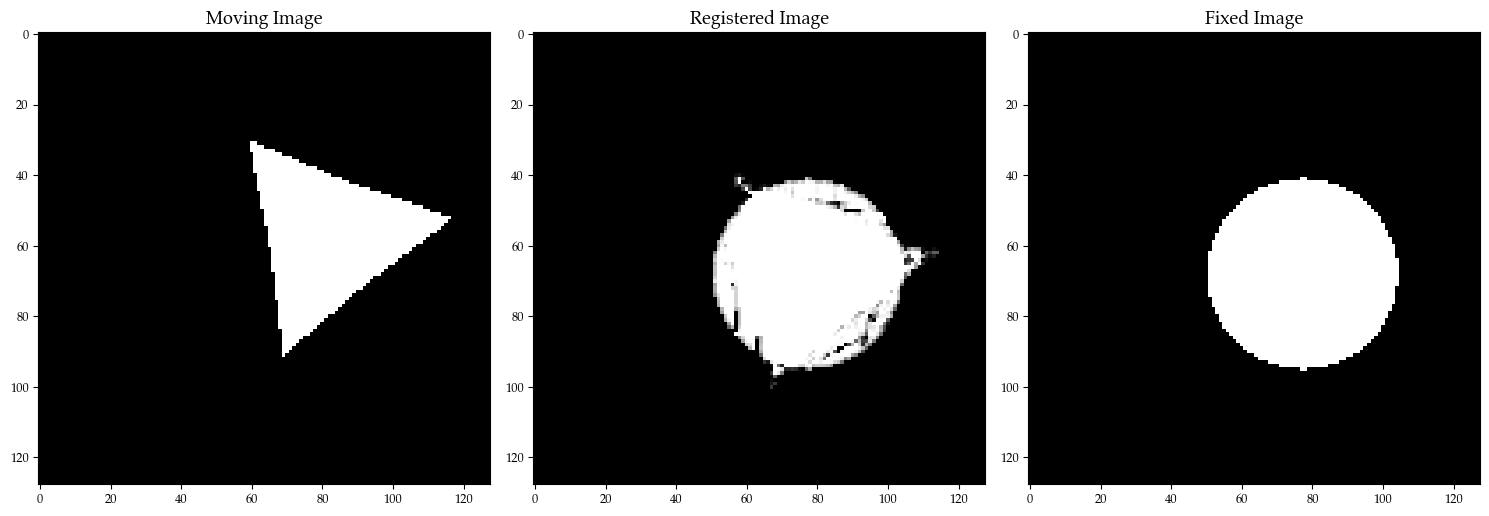

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,2)
plt.imshow(registered_images[45] ,cmap='gray', interpolation='none')
plt.title("Registered Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,3)
plt.imshow(test_set[45][1] ,cmap='gray', interpolation='none')
plt.title("Fixed Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,1)
plt.imshow(test_set[45][0] ,cmap='gray', interpolation='none')
plt.title("Moving Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.tight_layout()

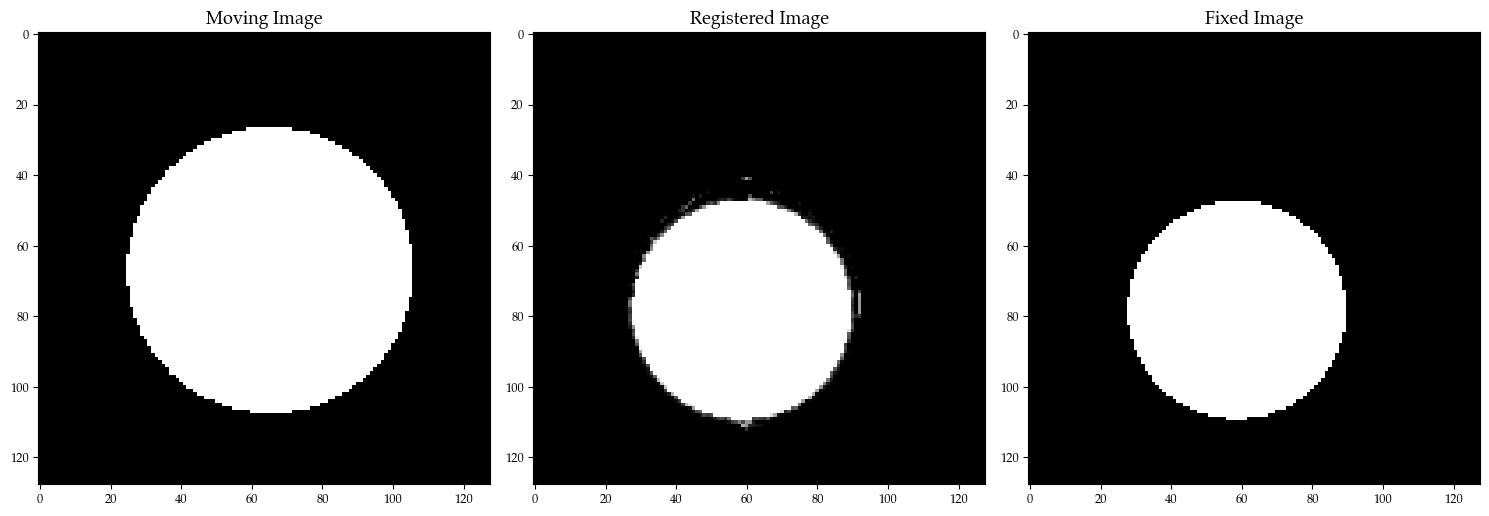

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,2)
plt.imshow(registered_images[111] ,cmap='gray', interpolation='none')
plt.title("Registered Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,3)
plt.imshow(test_set[111][1] ,cmap='gray', interpolation='none')
plt.title("Fixed Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,1)
plt.imshow(test_set[111][0] ,cmap='gray', interpolation='none')
plt.title("Moving Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.tight_layout()

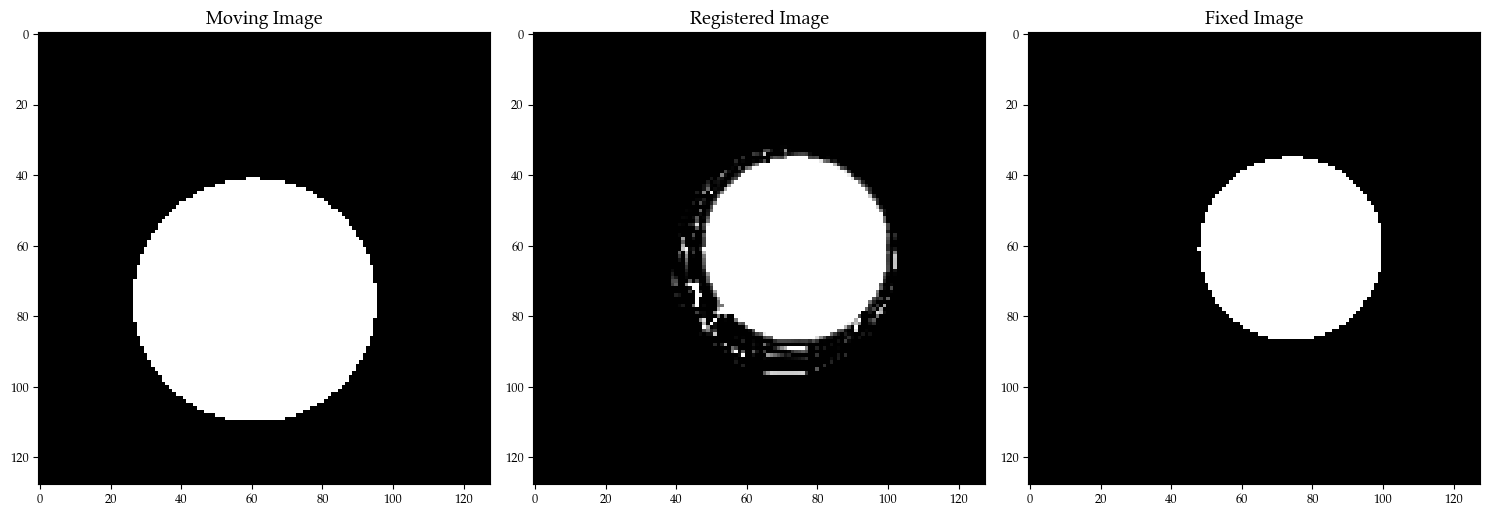

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,2)
plt.imshow(registered_images[131] ,cmap='gray', interpolation='none')
plt.title("Registered Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,3)
plt.imshow(test_set[131][1] ,cmap='gray', interpolation='none')
plt.title("Fixed Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,1)
plt.imshow(test_set[131][0] ,cmap='gray', interpolation='none')
plt.title("Moving Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.tight_layout()

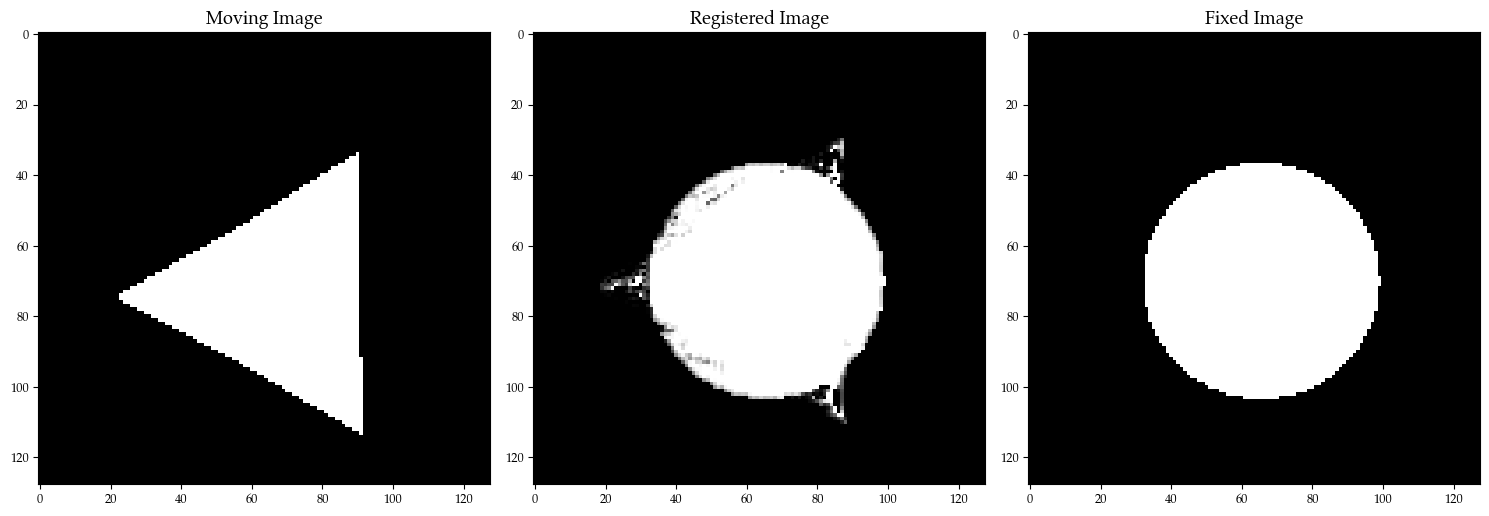

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,2)
plt.imshow(registered_images[34] ,cmap='gray', interpolation='none')
plt.title("Registered Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,3)
plt.imshow(test_set[34][1] ,cmap='gray', interpolation='none')
plt.title("Fixed Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,1)
plt.imshow(test_set[34][0] ,cmap='gray', interpolation='none')
plt.title("Moving Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.tight_layout()

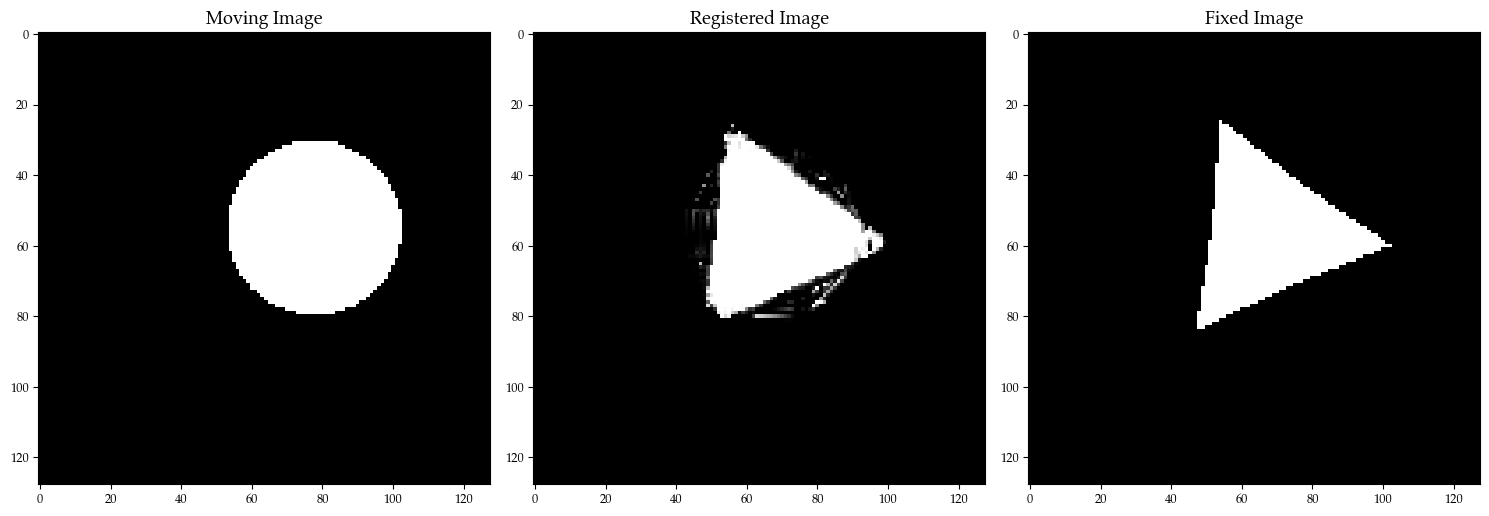

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,2)
plt.imshow(registered_images[48] ,cmap='gray', interpolation='none')
plt.title("Registered Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,3)
plt.imshow(test_set[48][1] ,cmap='gray', interpolation='none')
plt.title("Fixed Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.subplot(1,3,1)
plt.imshow(test_set[48][0] ,cmap='gray', interpolation='none')
plt.title("Moving Image", fontname='Palatino', fontsize=13)
plt.xticks(fontname='Palatino', fontsize=9)
plt.yticks(fontname='Palatino', fontsize=9)

plt.tight_layout()